In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("dataset/dataset.csv")

# Print all column names
print("Column Names in the Dataset:")
print(df.columns.tolist())


Column Names in the Dataset:
['assured_age', 'nominee_relation', 'occupation', 'policy sumassured', 'premium', 'premiumpaymentmode', 'annual income', 'holdermaritalstatus', 'indiv_requirementflag', 'policy term', 'policy payment term', 'product type', 'channel', 'fraud category']


In [4]:
# Specify the target column for fraud classes
fraud_column = "fraud category"

# Count the number of occurrences of each unique class in the fraud column
fraud_counts = df[fraud_column].value_counts()

# Print the counts
print("\nCount of Data for Each Fraud Class:")
print(fraud_counts)

# Store counts in an array
fraud_counts_array = fraud_counts.values

print("\nFraud Counts Array:")
print(fraud_counts_array)


Count of Data for Each Fraud Class:
fraud category
misrepresentation                             939
document tampering                            276
signature forgery                              39
misappropriating funds                         29
misselling                                     15
claims fraud                                   13
impersonation                                   6
logging in business not sourced by oneself      1
kickback                                        1
agent dual pan card                             1
unauthorized activity                           1
Name: count, dtype: int64

Fraud Counts Array:
[939 276  39  29  15  13   6   1   1   1   1]


/tmp/ipykernel_8743/2203556273.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis", ax=ax)
/tmp/ipykernel_8743/2203556273.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_8743/2203556273.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fraud category', y=col, data=data, palette="viridis")


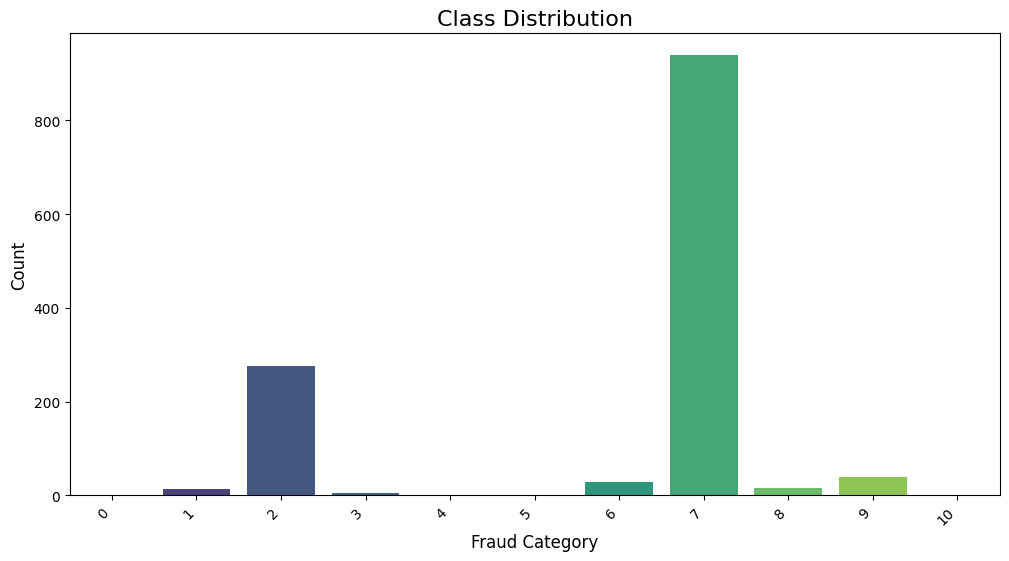

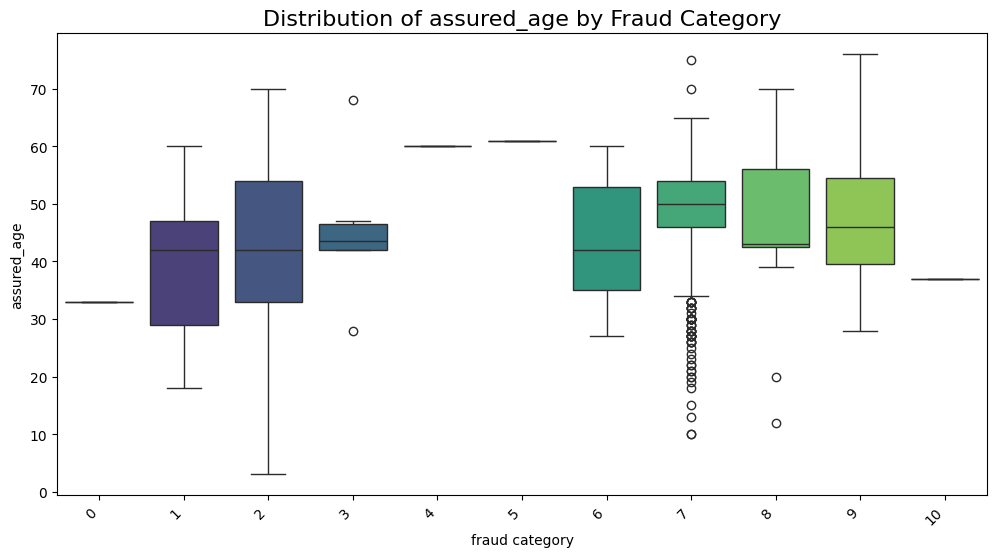

/tmp/ipykernel_8743/2203556273.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fraud category', y=col, data=data, palette="viridis")


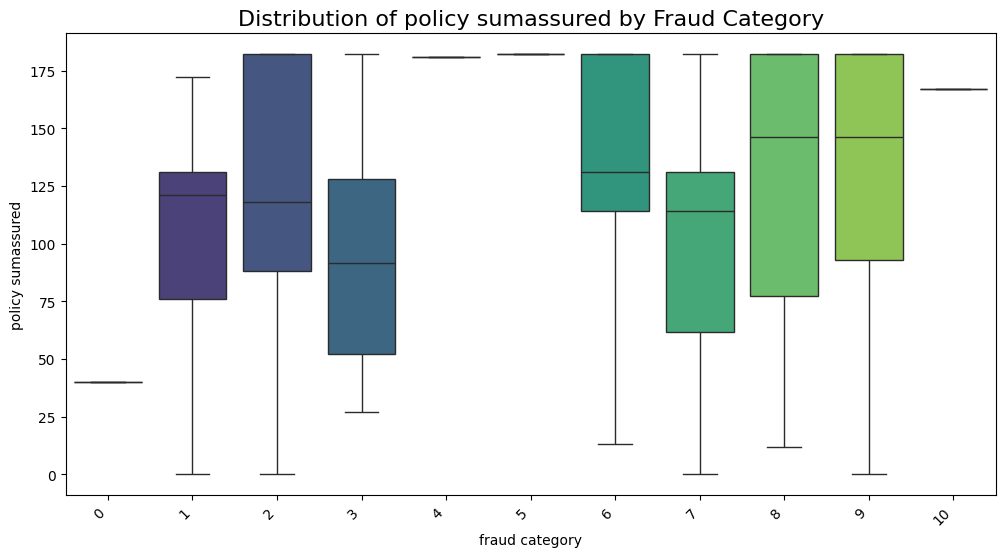

/tmp/ipykernel_8743/2203556273.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fraud category', y=col, data=data, palette="viridis")


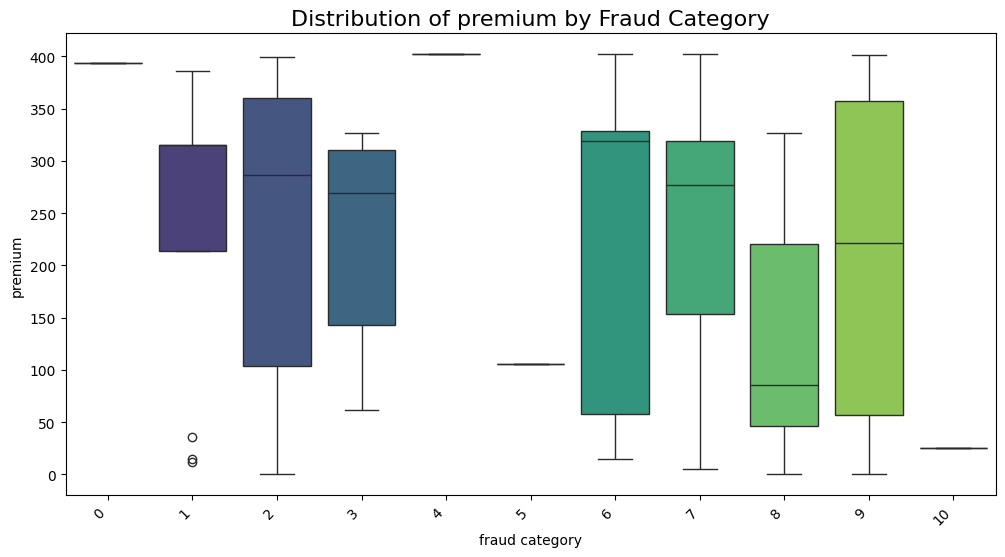

/tmp/ipykernel_8743/2203556273.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fraud category', y=col, data=data, palette="viridis")


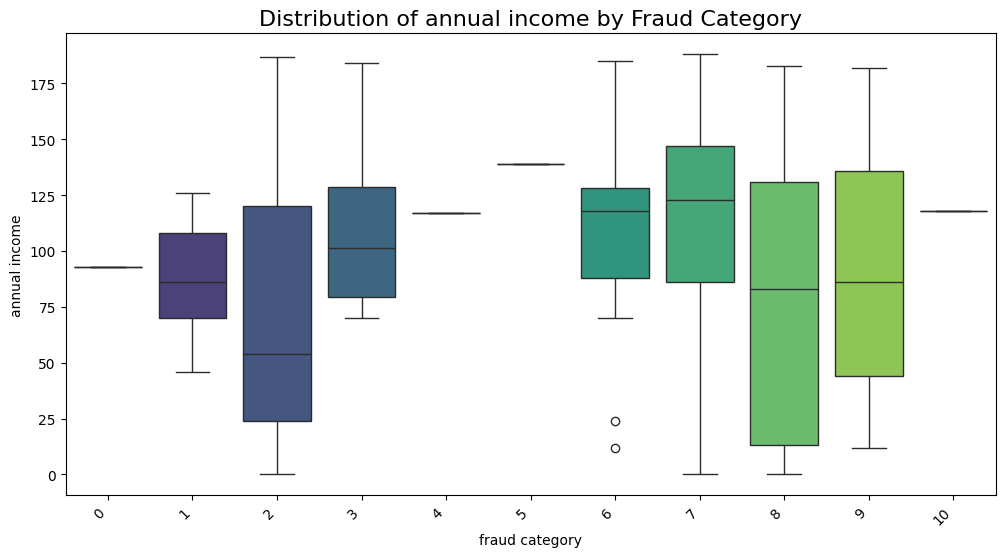

/tmp/ipykernel_8743/2203556273.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fraud category', y=col, data=data, palette="viridis")


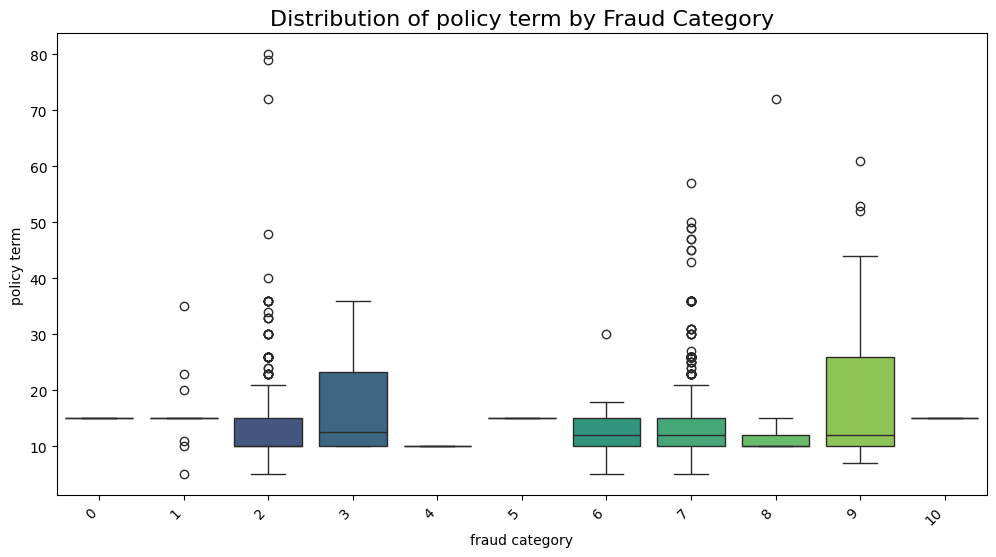

/tmp/ipykernel_8743/2203556273.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fraud category', y=col, data=data, palette="viridis")


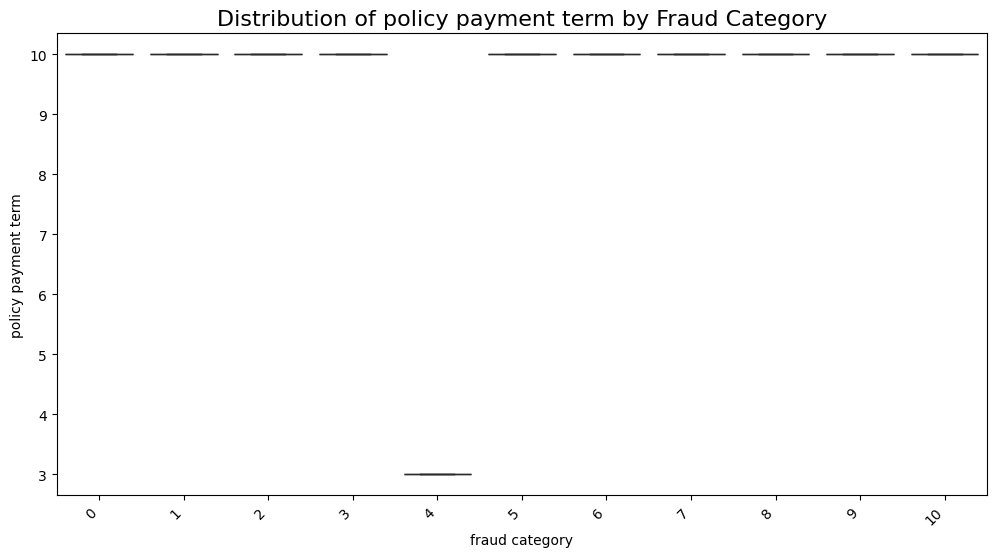

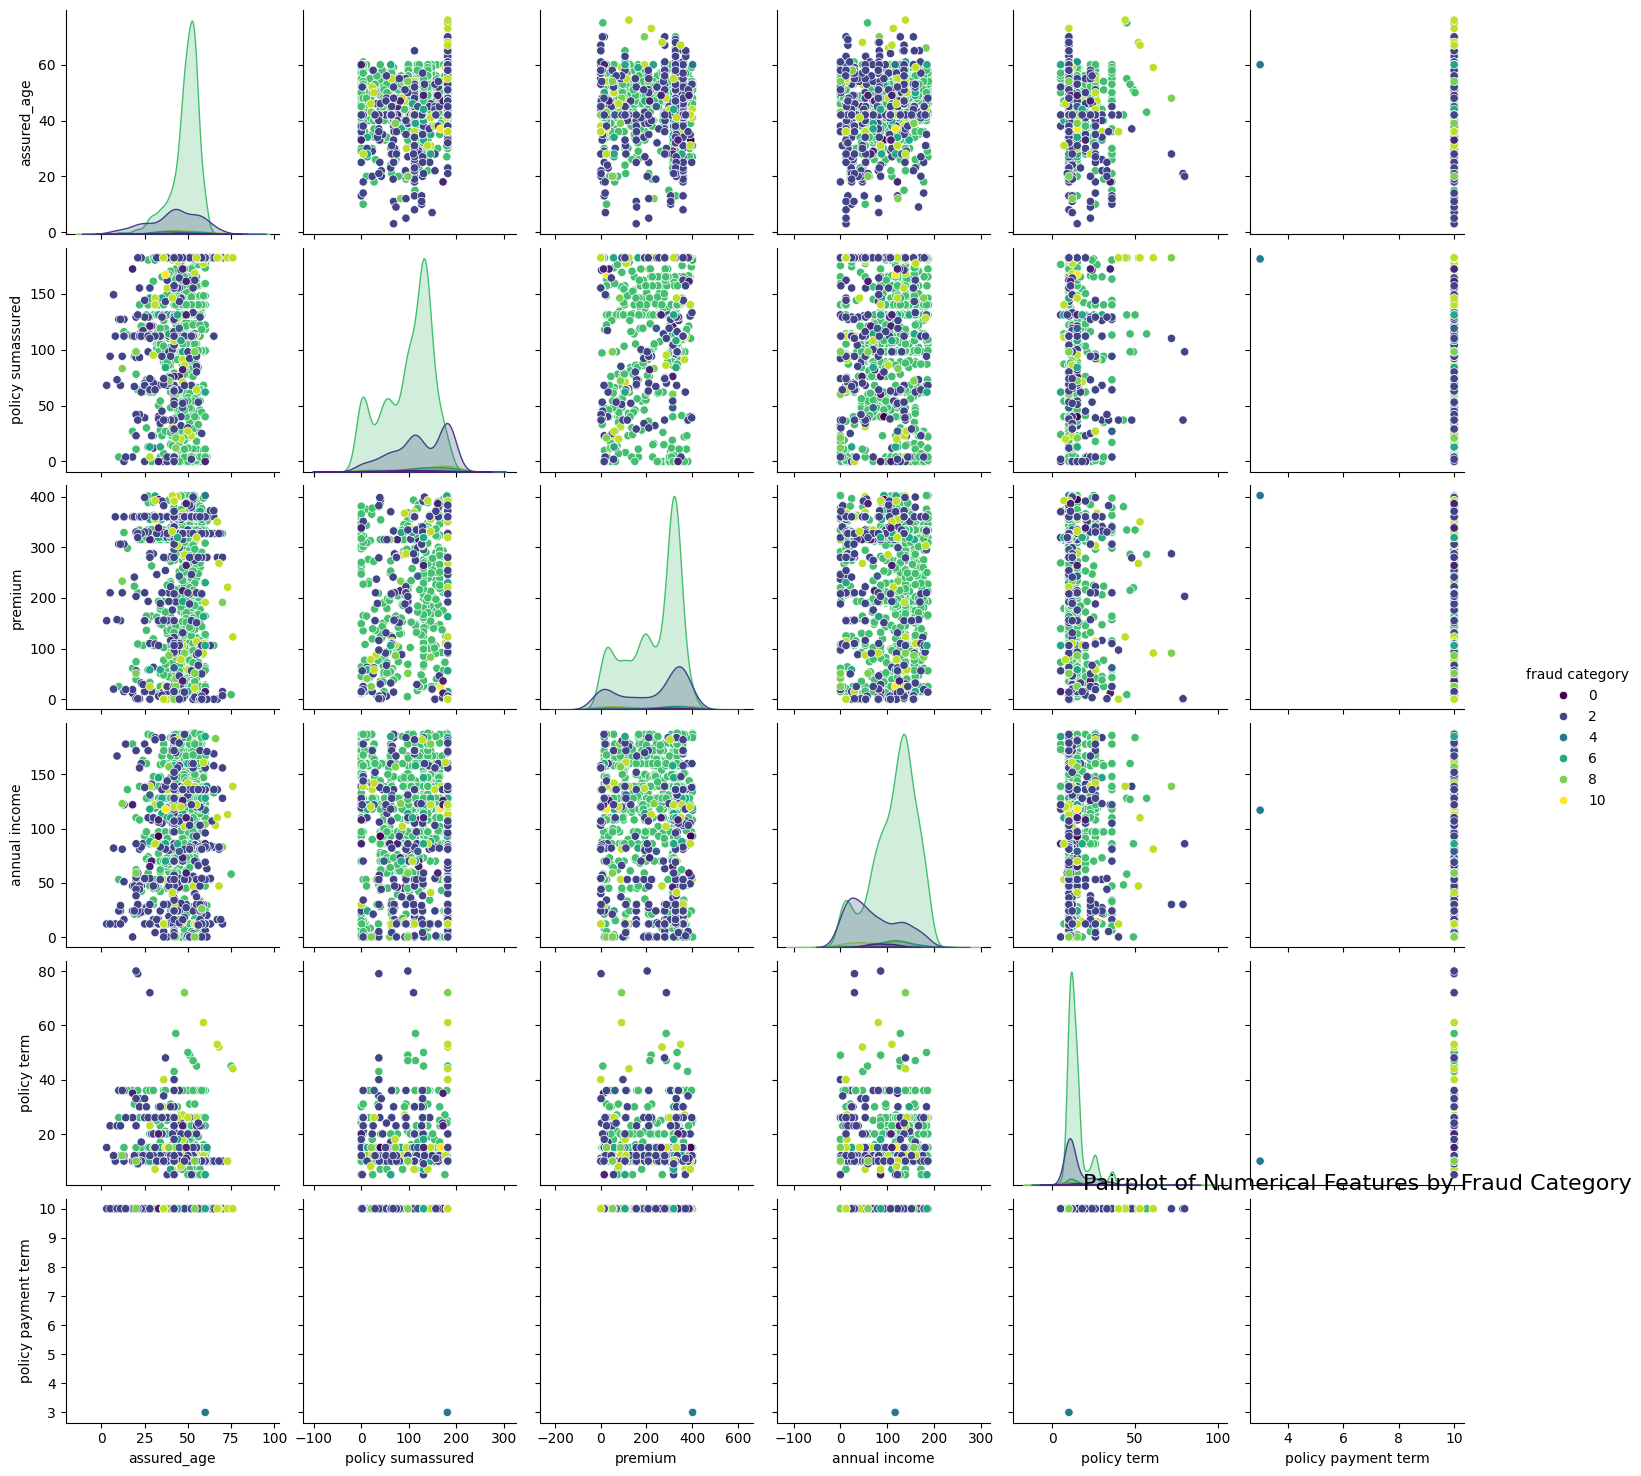

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("dataset/dataset.csv")

# Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()

# Handle categorical columns (e.g., using Label Encoding or One-Hot Encoding)
# In this example, we'll use Label Encoding for simplicity
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# 1. Class Distribution (Before Resampling)
def plot_class_distribution(data, title="Class Distribution", ax=None):
    ax = ax or plt.gca()
    class_counts = data['fraud category'].value_counts()
    sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis", ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Fraud Category", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 2. Box Plots for Numerical Features by Fraud Category (Before Resampling)
def plot_box_plots(data, numerical_columns, title_prefix="Distribution of", ax=None):
    for col in numerical_columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='fraud category', y=col, data=data, palette="viridis")
        plt.title(f"{title_prefix} {col} by Fraud Category", fontsize=16)
        plt.xticks(rotation=45, ha='right')
        plt.show()

# 3. Pair Plot for Feature Relationships
def plot_pairplot(data, numerical_columns):
    sns.pairplot(data[numerical_columns + ['fraud category']], hue='fraud category', palette="viridis")
    plt.title("Pairplot of Numerical Features by Fraud Category", fontsize=16)
    plt.show()

# Plot before resampling
numerical_columns = ['assured_age', 'policy sumassured', 'premium', 'annual income', 'policy term', 'policy payment term']

# 1. Class Distribution
plt.figure(figsize=(12, 6))
plot_class_distribution(df)

# 2. Box Plots for Numerical Features
plot_box_plots(df, numerical_columns)

# 3. Pair Plot for Numerical Features
plot_pairplot(df, numerical_columns)

# Now let's apply SMOTE and ENN for resampling (after which you can create the same plots again)

# Separate the features and target
X = df.drop(columns=['fraud category'])
y = df['fraud category']


In [20]:
import pandas as pd
import numpy as np

def balance_fraud_dataset(df, target_col='fraud category', threshold=10, target_samples=None):
    """
    Balance a highly imbalanced fraud dataset by:
    1. Combining very rare classes (< threshold samples) into 'Other Fraud'
    2. Undersampling the majority class
    3. Oversampling minority classes through repetition
    
    Parameters:
    -----------
    df : pandas DataFrame
        Input dataframe with fraud categories
    target_col : str
        Name of the target column
    threshold : int
        Minimum number of samples to keep a class separate
    target_samples : int, optional
        Desired number of samples per class. If None, median of class distribution is used.
    
    Returns:
    --------
    pandas DataFrame
        Balanced dataset
    """
    print("Original class distribution:")
    print(df[target_col].value_counts())
    
    # Step 1: Combine rare classes
    class_counts = df[target_col].value_counts()
    rare_classes = class_counts[class_counts < threshold].index
    
    df_processed = df.copy()
    if len(rare_classes) > 0:
        print(f"\nCombining {len(rare_classes)} rare classes into 'Other Fraud':")
        print(rare_classes.tolist())
        df_processed[target_col] = df_processed[target_col].replace(
            rare_classes, 'Other Fraud'
        )
    
    # Get new class distribution
    class_counts = df_processed[target_col].value_counts()
    print("\nClass distribution after combining rare classes:")
    print(class_counts)
    
    # Step 2: Set the target number of samples per class (use median or a specified value)
    if target_samples is None:
        target_samples = int(np.median(class_counts))
    print(f"\nTarget samples per class: {target_samples}")
    
    balanced_dfs = []
    
    for class_name in class_counts.index:
        class_df = df_processed[df_processed[target_col] == class_name]
        n_samples = len(class_df)
        
        if n_samples > target_samples:
            # Undersample majority classes
            balanced_dfs.append(class_df.sample(n=target_samples, random_state=42))
        else:
            # Oversample minority classes
            multiplier = target_samples // n_samples
            remainder = target_samples % n_samples
            
            oversampled = pd.concat([class_df] * multiplier)
            if remainder > 0:
                oversampled = pd.concat([
                    oversampled,
                    class_df.sample(n=remainder, random_state=42)
                ])
            
            balanced_dfs.append(oversampled)
    
    # Combine all balanced classes
    df_balanced = pd.concat(balanced_dfs, ignore_index=True)
    
    print("\nFinal class distribution:")
    print(df_balanced[target_col].value_counts())
    
    # Save to CSV
    df_balanced.to_csv('balanced_fraud_dataset.csv', index=False)
    print("Balanced dataset saved to balanced_fraud_dataset.csv")
    
    return df_balanced

# Example usage
df = pd.read_csv('dataset/dataset.csv')  # Load your dataset
balanced_df = balance_fraud_dataset(df, target_col='fraud category', threshold=10, target_samples=100)


Original class distribution:
fraud category
misrepresentation                             939
document tampering                            276
signature forgery                              39
misappropriating funds                         29
misselling                                     15
claims fraud                                   13
impersonation                                   6
logging in business not sourced by oneself      1
kickback                                        1
agent dual pan card                             1
unauthorized activity                           1
Name: count, dtype: int64

Combining 5 rare classes into 'Other Fraud':
['impersonation', 'logging in business not sourced by oneself', 'kickback', 'agent dual pan card', 'unauthorized activity']

Class distribution after combining rare classes:
fraud category
misrepresentation         939
document tampering        276
signature forgery          39
misappropriating funds     29
misselling               

In [21]:
# Save the balanced dataset to a different CSV file
balanced_df.to_csv('balanced_fraud_dataset_v2.csv', index=False)


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the balanced dataset
df = pd.read_csv('dataset/balanced_dataset.csv')

# Stratified split into train (60%) and remaining (40%)
train_df, remaining_df = train_test_split(df, test_size=0.4, random_state=42, stratify=df['fraud category'])

# Further split the remaining dataset into validation (50% of 40%) and test (50% of 40%)
val_df, test_df = train_test_split(remaining_df, test_size=0.5, random_state=42, stratify=remaining_df['fraud category'])

# Save the splits into separate CSV files
train_df.to_csv('train_fraud_dataset.csv', index=False)
val_df.to_csv('val_fraud_dataset.csv', index=False)
test_df.to_csv('test_fraud_dataset.csv', index=False)

print("Train, validation, and test sets have been saved.")


Train, validation, and test sets have been saved.
